# Heart Disease Prediction

This database has 76 attributes, but all published experiments refer to using a subset of 14 of them. Given these clinical parameters about a patient, we are predicting whether they have heart disease or not. 


Attribute Information:

> 1.age = age in years

> 2.sex= (1 = male; 0 = female)

> 3.cp = chest pain type 
    <br>
    &emsp;0: Typical angina: chest pain related decrease blood supply to the heart
    <br>
    &emsp;1: Atypical angina: chest pain not related to heart
    <br>
    &emsp;2: Non-anginal pain: typically esophageal spasms (non heart related)
    <br>
    &emsp;3: Asymptomatic: chest pain not showing signs of disease
    <br>

> 4.trestbpsr = esting blood pressure (in mm Hg on admission to the hospital)

> 5.chol = serum cholestoral in mg/dl
 <br>&emsp;serum = LDL + HDL + .2 * triglycerides
 <br>&emsp;above 200 is cause for concern

> 6.fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

> 7.restecg = resting electrocardiographic results
<br>&emsp;0: Nothing to note
<br>&emsp;1: ST-T Wave abnormality 
<br>&emsp;2: Possible or definite left ventricular hypertrophy

> 8.thalach = maximum heart rate achieved

> 9.exang = exercise induced angina (1 = yes; 0 = no)

> 10.oldpeak = ST depression induced by exercise relative to rest

> 11.slope = the slope of the peak exercise ST segment
<br>&emsp;0: Upsloping: better heart rate with excercise (uncommon)
<br>&emsp;1: Flatsloping: minimal change (typical healthy heart)
<br>&emsp;2: Downslopins: signs of unhealthy heart

> 12.ca = number of major vessels (0-3) colored by flourosopy

> 13.thal = 3 = normal; 6 = fixed defect; 7 = reversable defect

> 14.target = 1 or 0

## Machine Learning Algortihm

We use the following ML algorithm to predict the heart disease: 
> &emsp;Logistic Regression
> <br>&emsp;K Neighbours Classifiers
> <br>&emsp;Support Vector Machine
> <br>&emsp;Naive Bayes
> <br>&emsp;Random Forest


# Data Exploration

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


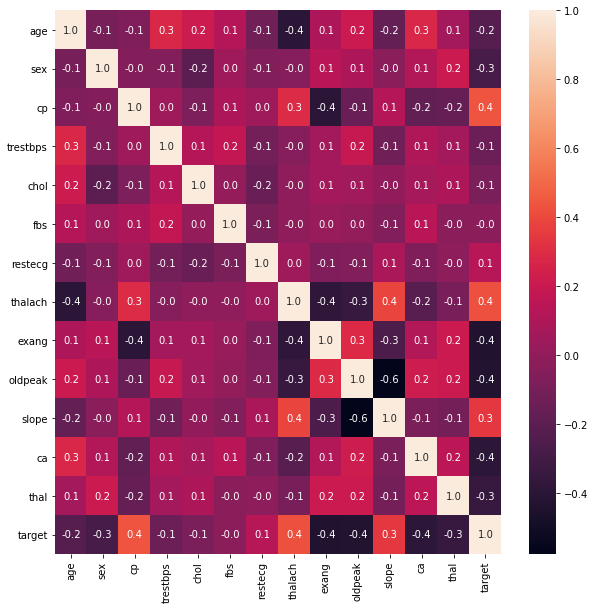

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

In [7]:
#age analysis
df.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

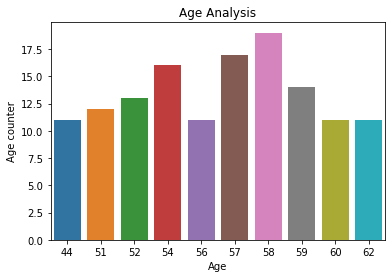

In [8]:
sns.barplot(x= df.age.value_counts()[:10].index, y= df.age.value_counts()[:10].values  )
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of patients dont have heart disease: {:.2f}%".format((countNoDisease/(len(df.target)))*100))
print("Percentage of patients have heart disease: {:.2f}%".format((countHaveDisease/(len(df.target)))*100))

Percentage of patients dont have heart disease: 45.54%
Percentage of patients have heart disease: 54.46%


In [11]:
countFemale= len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("% of Female Patients: {:.2f}%".format((countFemale/(len(df.sex))*100)))
print("% of male Patients: {:.2f}%".format((countMale/(len(df.sex))*100)))

% of Female Patients: 31.68%
% of male Patients: 68.32%


In [12]:
young_ages = df[(df.age>=29)&(df.age<40)]
middle_ages = df[(df.age>=40)&(df.age<55)]
elderly_ages = df[(df.age>=55)]
print("young ages", len(young_ages))
print("middle ages", len(middle_ages))
print("elderly ages", len(elderly_ages))

young ages 16
middle ages 128
elderly ages 159


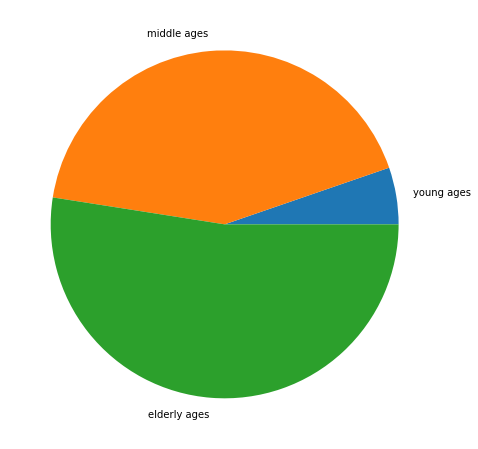

In [13]:
colors = ['blue','green', 'red']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(young_ages), len(middle_ages), len(elderly_ages)], labels=['young ages', 'middle ages', 'elderly ages'])
plt.show()

In [14]:
#chest pain analysis
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [15]:
df.target.unique()

array([1, 0], dtype=int64)

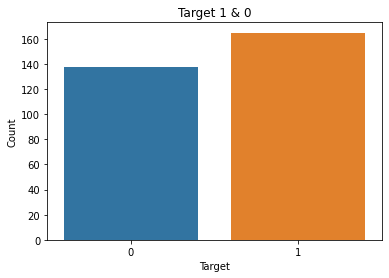

In [16]:
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target 1 & 0')
plt.show()

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [18]:
# Model Building

In [19]:
x_data = df.drop(['target'], axis = 1)
y = df.target.values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, random_state= 0)

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('LR Accuracy {:.2f}%'.format(lr.score(x_test, y_test)*100))

LR Accuracy 85.25%


In [22]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
print("KNN accuracy: {:.2f}%".format(knn.score(x_test, y_test)*100))

KNN accuracy: 63.93%


In [23]:
# support vector
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
print("SVC accuracy: {:.2f}%".format(svm.score(x_test, y_test)*100))

SVC accuracy: 68.85%


In [24]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("NB accuracy: {:.2f}%".format(nb.score(x_test, y_test)*100))

NB accuracy: 85.25%


In [25]:
# Random forset

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state= 1)
rf.fit(x_train, y_train)
print("Random Forest accuracy: {:.2f}%".format(rf.score(x_test, y_test)*100))

Random Forest accuracy: 85.25%
